### Visualisation and Analysis of Suicides In UnitedKingdom

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/who_suicide_statistics.csv')

In [3]:
df.isnull().sum()#number of missing values
df.dropna(axis=0,inplace=True) # deleting null values
df.shape #new shape after deleteion of values

(36060, 6)

In [4]:
UK = df[df['country']=='United Kingdom']

In [5]:
UK.head()

,country,year,sex,age,suicides_no,population
41460,United Kingdom,1979,female,15-24 years,119.0,4189200.0
41461,United Kingdom,1979,female,25-34 years,203.0,3917300.0
41462,United Kingdom,1979,female,35-54 years,617.0,6438700.0
41463,United Kingdom,1979,female,5-14 years,3.0,4212200.0
41464,United Kingdom,1979,female,55-74 years,742.0,6191200.0


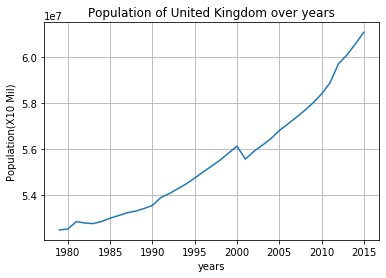

In [6]:
years = np.unique(UK.year)

a = []
dict = {}
for i in years:
    sum = UK[UK['year']==i]['population'].values.sum()
    dict[i] = sum 
a.append(dict)
UKyear_df = pd.DataFrame(a)
UKyear_df = np.transpose(UKyear_df) #correction of length missmatch if any
UKyear_df.columns = ['Population'] 

plt.plot(UKyear_df)
plt.title('Population of United Kingdom over years')
plt.xlabel('years')
plt.ylabel('Population(X10 Mil)')
plt.grid()
plt.show()

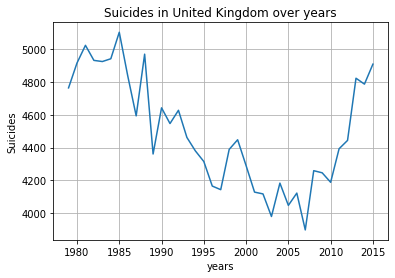

In [7]:

years = np.unique(UK.year)

a = []
dict = {}
for i in years:
    sum = UK[UK['year']==i]['suicides_no'].values.sum()
    dict[i] = sum 
a.append(dict)
UKyear_df = pd.DataFrame(a)
UKyear_df = np.transpose(UKyear_df) #correction of length missmatch if any
UKyear_df.columns = ['Suicides'] 

plt.plot(UKyear_df)
plt.title('Suicides in United Kingdom over years')
plt.xlabel('years')
plt.ylabel('Suicides')
plt.grid()
plt.show()


### Age

Text(0.5, 1.0, 'Suicide Pattern in UK')

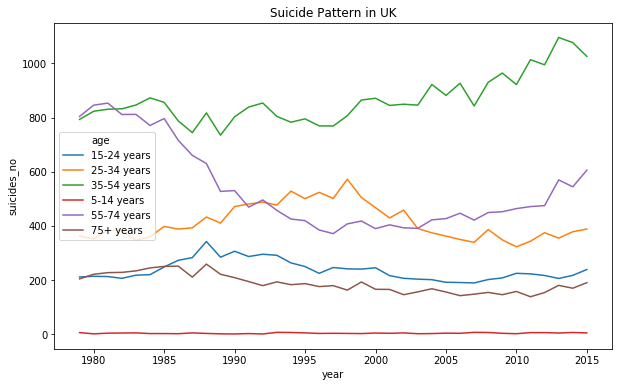

In [8]:
plt.figure(figsize = (10,6))
sns.lineplot(x='year',y='suicides_no',hue='age',data=df[df['country'] == 'United Kingdom'],ci=None )
plt.title('Suicide Pattern in UK')

### Gender

Text(0.5, 1.0, 'Suicide Pattern in UK')

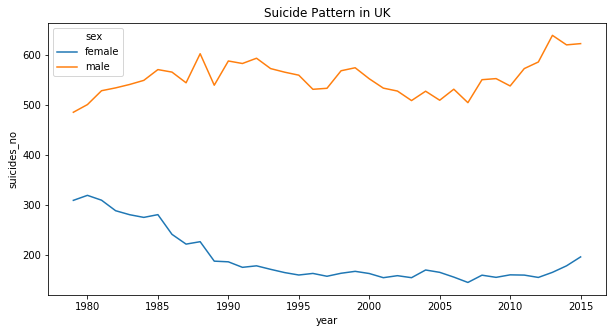

In [9]:
plt.figure(figsize = (10,5))
sns.lineplot(x='year',y='suicides_no',hue='sex',data=df[df['country'] == 'United Kingdom'],ci=None )
plt.title('Suicide Pattern in UK')




###  Linear Regression


In [10]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [11]:
# Use only one feature: year
UK_data = UK.values
year = UK_data[:,1]
x = np.unique(year).reshape(-1,1)
y = UKyear_df.Suicides.values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=42)

In [12]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print("Testing data:",reg.score(x_test,y_test))
print("Training data:",reg.score(x_train,y_train))

Testing data: 0.2348870492799109
Training data: 0.3028348607866752


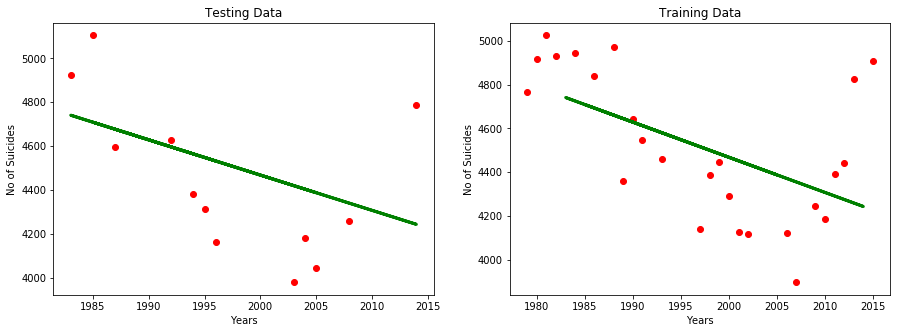

In [13]:
plt.figure(figsize=(15,5))
#plot for testing data
plt.subplot(121)
plt.scatter(x_test, y_test,  c ='red')
plt.plot(x_test, y_pred, c ='green', linewidth=3)
plt.title('Testing Data')
plt.xlabel('Years')
plt.ylabel('No of Suicides')

#plot for training data
plt.subplot(122)
plt.scatter(x_train, y_train,  c ='red')
plt.plot(x_test, y_pred, c ='green', linewidth=3)
plt.title('Training Data')
plt.xlabel('Years')
plt.ylabel('No of Suicides')
plt.show()

In [14]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-16.0455872]
Variance score: 0.23


In [15]:
f = np.array(2016)
print(reg.predict(f.reshape(-1,1)))

[4211.65019624]


### 
Acc to Linear Regression it is predicted to have about 4211 sucides the coming year in the UNITED KINGDOM.

### Polynomial Regression

0.8533242148040172


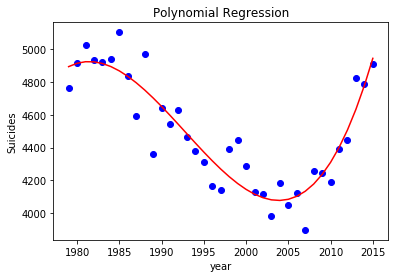

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =7) # Checked that ot gives a better r2 score
X_poly = poly.fit_transform(x)

poly.fit(X_poly,y)

lin2 = LinearRegression()
lin2.fit(X_poly,y)
print(lin2.score(X_poly,y))

plt.scatter(x,y,c="b")

plt.plot(x,lin2.predict(poly.fit_transform(x)),c='r')
plt.title("Polynomial Regression")
plt.xlabel("year")
plt.ylabel("Suicides")
plt.show()


In [17]:

r2 = r2_score(y,lin2.predict(poly.fit_transform(x)))
print("r2 score :", r2)


r2 score : 0.8533242148040172


In [18]:
print('Coefficients: \n', lin2.coef_)



Coefficients: 
 [ 0.00000000e+00 -2.87383864e-14  1.13449614e-17  2.05039337e-14
  2.72976351e-11  2.27141712e-08 -1.89990251e-11  4.08626222e-15]


In [19]:
age_coder = {'5-14 years':0,
            '15-24 years':1,
            '25-34 years':2,
            '35-54 years':3,
            '55-74 years':4,
            '75+ years':5} #assigning diff values to each group in the dataset
gender_coder = {'female':0,'male':1} # assigning diff values to each gender group in the dataset
age = {0:'5-14 years',
      1:'15-24 years',
      2:'25-34 years',
      3:'35-54 years',
      4:'55-74 years',
      5:'75+ years'}
sex = {0:'female',1:'male'}

In [20]:
UK['age_encoder'] = UK['age'].map(age_coder)
UK['sex_encoder'] = UK['sex'].map(gender_coder)

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
UK.head()

,country,year,sex,age,suicides_no,population,age_encoder,sex_encoder
41460,United Kingdom,1979,female,15-24 years,119.0,4189200.0,1,0
41461,United Kingdom,1979,female,25-34 years,203.0,3917300.0,2,0
41462,United Kingdom,1979,female,35-54 years,617.0,6438700.0,3,0
41463,United Kingdom,1979,female,5-14 years,3.0,4212200.0,0,0
41464,United Kingdom,1979,female,55-74 years,742.0,6191200.0,4,0


### KNN


In [30]:
x = UK.population.values
y = UK.suicides_no.values

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [35]:


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train.reshape(-1,1))
x_test = sc.transform(x_test.reshape(-1,1))



In [36]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5, metric="minkowski", p =2)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)


In [37]:
from sklearn.metrics import accuracy_score
print("accuracy of testing data:",accuracy_score(y_test,y_pred))
print("accuracy of training data :",accuracy_score(y_train,clf.predict(x_train)))

accuracy of testing data: 0.0
accuracy of training data : 0.0028169014084507044


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]
